In [79]:
import pandas as pd
import numpy as np
import os
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# additional libraries and settings

#rcParams are the parameters that can be set in the .matplotlibrc file
from matplotlib import rcParams

#An instance of RcParams for handling default matplotlib values with x, y
rcParams['figure.figsize'] = 5, 5

#Import missingno
import missingno as missno 

In [81]:
# set working directory
# set working directory
working_dir = "./Team1_Project/" 
print(f"current working directory: \n {os.getcwd()}")

if working_dir.split('/')[-2] in list(os.listdir()):
    os.chdir(f"{working_dir}")
    print(f"New working directory: \n {os.getcwd()}")

current working directory: 
 /mnt/vocwork5/ddd_v1_w_mqs_1155329/asn779086_5/asn779087_1/work/Team1_Project


# Final Project Assignment

The primary purpose to achieve is understanding of Data Wrangling Phase undertaken as part of the Data Preparation task.  The task undertaken and its result should exhibit participant's in-depth understanding in the phases of Data Wrangling, which requires participant to show a methodical step-by-step of achieving each of these phases.  For example, in the cleaning phase, first dissect into the various applicable steps and apply onto the dataset through any applicable function.

## Options of Project Scenario

### Scenario 1
You can imagine the wrangling task is catered for data science Modelling phase. You are to prepare the modelling using dataset and apply the various phases and cover largely what have been taught. 

### Scenario 2
You can imagine the wrangling task is designed for a System. There could be various sources(structured + unstructured) where you combine the files together using python (using identifier).

### Scenario 3
You can imagine you are wrangling from various sources i.e. twitter (need to apply API in advance). These will go to the reporting for instance business reporting, steering committee, general meeting, etc…

### Scenario 4
Any other permissible scenario that exhibits what have been largely taught and application of various phases.

## Data Set Consideration

Your dataset must at least satisfy option 1 below. Option 2 is optional and is highly encouraged.
1. Small dataset (between 1k - 100k)
2. (optional) Mid-size dataset (between 100k - 10mil)

You need to apply what you have learnt to the following phases:
* Data Discovery
* Data Structuring
* Data Cleaning and Validation
* Data Enrichment
* Data Aggregation

You should take note of the following consideration:
* Your dataset should include at least one less structured data
* You should use more than 1 dataset for certain phases such as Data Enrichment/Blending i.e. (1) x 2 dataset + (2) x 2 dataset: >4 dataset
* As this is a group work, you are expected to start early searching for the appropriate dataset. 


# Team 1 Project: Data Wrangling of Streaming Platforms

## User Persona

The average person who is considering which streaming platform to subscribe to, and want to make a more informed decision based on their personal preferences for shows, movies, actors/actresses, directors, genres, budget and more that each platform provides.

### User Persona: Edwardo

Edwardo is a huge fan of the the Rock. He watches all his movies multiple times but only has a budget of $20 a month to subscribe to one streaming platform. He wants to know which platform has the most "the Rock" content, particularly his best rates films.

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.sportbible.com/cdn-cgi/image/width=1200,quality=70,format=jpeg,fit=contain,dpr=1/https%3A%2F%2Fs3-images.sportbible.com%2Fs3%2Fcontent%2F56d01e755b84e6e74ea503880d5a02df.png")

### User Persona: Jeff & his family

Jeff loves action and comedy films but he also has a young daughter and wants to find a streaming platform that has both kid friendly rated content as well as the action and comedy content he can watch in his own time. He wants to get a streaming platform that he can share with his mom and dad as well. He's also a fan of James Cameron and Tina Fey.

In [5]:
Image(url= "https://techcrunch.com/wp-content/uploads/2018/08/man-with-baby-e2b3fb56ca40e03ac52d85417c23e85e7a084fba1095f06229fd8f3ca7275550-1.jpg?w=730&crop=1")

### User Persona: Amy Lee

Amy is a film buff and she is currently in film school. She wants to watch all the highly acclaimed films and shows, as well as the upcoming indie content that inspires her work. Amy needs a wide range of entertainment, from the classics to foreign films to animated films and shows. She is willing to subscribe to two streaming platforms to meet her demands.

In [4]:
Image(url= "https://media.cca.edu/images/webimage-3ABECAF8-6FA6-4FF3-9D4015.54fd838a.fill-900x700.jpg")

## Problem Statement:

There are many streaming platforms available, however it can get cost upwards of $33+/month for subscriptions to all of them which can get quite expensive and redudant. We want to address the issue that users face of which platform(s) to subscribe to based on their preferences and needs like genre, film rating (PG, R etc.), director, cast, number of films, number of tv shows, and how fast they were added to the platform from their release date (ex. new release frequency).

## Background on Streaming Platforms
- Netflix:
    - Netflix has over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally.
    - Netflix membership is (United States Dollar). \\$9.99 (1 screen) \\$15.49 (2 screens) \\$19.99 per month (up to 4 screens)
 
- Amazon Prime:
    - Amazon Prime has close to 10,000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally.
    - Prime Video membership is \\$8.99 per month
    
- Disney+:
    - Disney+ has close to 1,300 movies or tv shows available on their platform, as of mid-2021, they have over 116M Subscribers globally.
    - Disney+ membership is \\$7.99 per month or \\$79.99 annually ($6.66 per month)
    
- Hulu:
    - Hulu is an online movie and tv shows streaming platform owned by The Walt Disney Company. Hulu is exclusive to the United States and is not available in other countries.
    - Hulu membership is \\$6.99/month (or \\$69.99/year) with ads. Hulu (No Ads) is \\$12.99/month you can watch most of those same shows and movies without the ad breaks. 

# Data Acquisition/Discovery:
## Streaming platform dataset (structured data)
- Four structured data files from Kaggle, one for each streaming platform (Netflix, Disney+, Amazon Prime, Hulu)
- The number of records vary between datasets from 3000 to 9000.
- Details include title, cast, director, maturity rating, duration, production year, release dates, show description.
- Combined, this dataset provides about 22,000 titles across four platforms covering movies and tv shows for analysis. 

*Data Source:*
- https://www.kaggle.com/shivamb/netflix-shows?select=netflix_titles.csv
- https://www.kaggle.com/shivamb/amazon-prime-movies-and-tv-shows
- https://www.kaggle.com/shivamb/disney-movies-and-tv-shows
- https://www.kaggle.com/shivamb/hulu-movies-and-tv-shows

## Show ratings from IMDb (structured data)
- Dataset from Kaggle includes IMDb and Rotten Tomatoes ratings of shows hosted on the four streaming platforms above.
- This dataset provides about 16700 titles across movies and tv shows.
- There are some other overlap of details with the streaming platform datasets plus new information such as language.

*Data Source:*
- https://www.kaggle.com/code/ruchi798/movies-data-collection-eda-using-tableau/data

## Show ratings from Metacritic (unstructured data)
- Datasets extracted from unstructured text scrapped from Metacritic website.
- Data scrapped are title, date released, metacritic ratings and metacritic user ratings.
- This dataset provides about 17800 titles across movies and tv shows. 

*Data Source:*
- https://www.metacritic.com/browse/movies/score/metascore/all/filtered?view=condensed&page=
- https://www.metacritic.com/browse/tv/score/metascore/all/filtered?view=condensed&sort=desc&page=

In [82]:
# some basic data discovery

file = []
file.append('netflix_titles.csv')
file.append('amazon_prime_titles.csv')
file.append('amazon_prime_titles.csv')
file.append('hulu_titles.csv')
file.append('ratings_MoviesRatings.csv')
file.append('metacritic_movie_ratings.csv')
file.append('metacritic_tv_ratings.csv')

no_of_datasets = 7

for file_no in range(no_of_datasets):

    df = pd.read_csv(file[file_no])
    print(file[file_no])
    row, col = df.shape
    print('row = {}, col = {}'.format(row,col))
    print('columns : ', df.columns)
    print(df.dtypes)
    display(df.head())
    display(df.describe())
    print("")

netflix_titles.csv
row = 8807, col = 12
columns :  Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000



amazon_prime_titles.csv
row = 9668, col = 12
columns :  Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000



amazon_prime_titles.csv
row = 9668, col = 12
columns :  Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000



hulu_titles.csv
row = 3073, col = 12
columns :  Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
show_id          object
type             object
title            object
director         object
cast            float64
country          object
date_added       object
release_year      int64
rating           object
duration         object
listed_in        object
description      object
dtype: object


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...


,cast,release_year
count,0.0,3073.000000
mean,NaN,2012.567524
std,NaN,10.844069
min,NaN,1923.000000
25%,NaN,2010.000000
50%,NaN,2016.000000
75%,NaN,2019.000000
max,NaN,2021.000000



ratings_MoviesRatings.csv
row = 16744, col = 17
columns :  Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')
Unnamed: 0           int64
ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object


,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


,Unnamed: 0,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8371.500000,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,0.000000,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4185.750000,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8371.500000,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12557.250000,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16743.000000,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000



metacritic_movie_ratings.csv
row = 14745, col = 4
columns :  Index(['Title', 'Date_Released', 'Metacritic_Score', 'Metacritic_User_Score'], dtype='object')
Title                     object
Date_Released             object
Metacritic_Score         float64
Metacritic_User_Score    float64
dtype: object


,Title,Date_Released,Metacritic_Score,Metacritic_User_Score
0,The Godfather,"March 24, 1972",100.0,9.2
1,Citizen Kane,"September 4, 1941",100.0,8.4
2,Rear Window,"September 1, 1954",100.0,8.8
3,Casablanca,"January 23, 1943",100.0,8.8
4,Boyhood,"July 11, 2014",100.0,7.5


,Metacritic_Score,Metacritic_User_Score
count,14745.000000,14745.000000
mean,58.955714,5.233815
std,17.143208,3.003520
min,1.000000,0.000000
25%,47.000000,4.000000
50%,61.000000,6.400000
75%,72.000000,7.500000
max,100.000000,9.400000



metacritic_tv_ratings.csv
row = 3092, col = 4
columns :  Index(['Title', 'Date_Released', 'Metacritic_Score', 'Metacritic_User_Score'], dtype='object')
Title                     object
Date_Released             object
Metacritic_Score         float64
Metacritic_User_Score    float64
dtype: object


,Title,Date_Released,Metacritic_Score,Metacritic_User_Score
0,Rectify: Season 4,"October 26, 2016",99.0,8.7
1,The Larry Sanders Show: Season 4,"July 19, 1995",99.0,5.8
2,Murder One: Season 1,"September 19, 1995",99.0,6.4
3,The Larry Sanders Show: Season 6,"March 15, 1998",99.0,5.5
4,Breaking Bad: Season 5,"July 15, 2012",99.0,9.6


,Metacritic_Score,Metacritic_User_Score
count,3092.000000,3092.000000
mean,64.868693,6.174806
std,15.006013,2.430281
min,13.000000,0.000000
25%,55.000000,5.400000
50%,66.000000,6.900000
75%,76.000000,7.900000
max,99.000000,9.800000


# Shared functions:

## `movecol` - Shift columns in dataframe

In [83]:
def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

In [84]:
# question: Vin to Gus: to delete this unused cell
# import pandas as pd
# df_c = pd.read_csv("./Combined_Platforms.csv")
# df_c.dropna(inplace=True)
# categorical_col = ["platform"]
# bool_col = ["type"]
# # categorical_col = list(set(categorical_col) - set(bool_col))
# # question: Vin to Gus: can delete this get_category_count_dict() 
# # categorical_dict, value_counts_dict, max_num_rows = get_category_count_dict(df=df_c,categorical_col=categorical_col)

# cate_col = list(categorical_dict.keys())
# ordi_col = list(map(lambda x: f"{x}_ordi", cate_col))

# def get_cate_to_ordi_col_wise(x_name, x, dummy_series, categorical_dict=categorical_dict):
#     return categorical_dict[x].index(x_name)

# df_c[ordi_col] = df_c[cate_col].apply(lambda x: x.apply(get_cate_to_ordi_col_wise, args=(x.name, x)))
# display(df_c[cate_col+ordi_col])
                   

In [85]:
# question: @Vin to @Gus: can delete this unused cell
# import pandas as pd
# df = pd.read_csv("./Combined_Platforms.csv")
# print(df.shape)
# #drop missing date_added
# print(f"missing values: date_added {df.date_added.isna().sum()}, release_year {df.release_year.isna().sum()} ")
# df = df[df.date_added.isna()==False] 
# print(df.shape)

# gap_year, gap_day = get_gap_between_dates(df, 	
#     column_date_start="release_year", format_start = "%Y-%m-%d", 
#     column_date_end="date_added", format_end="%Y",
#     gap_type="Year")

# display(df[["release_year", "date_added", col_out, "gap_day_"]])
# # print(df[gap_year].value_counts())
# output_dir = "10_temporary_output/"
# df.to_csv(output_dir + "date_gap.csv", index=False)

## `get_lowercase_columns` - Convert columns cells to lower cases


In [86]:
import pandas as pd
"""
purpose: todo
input: df, columns to be coverted
output: name of converted col
"""


def get_lowercase_columns(df, columns: list, output_column_suffix="_"):
    output_column = []
    for c in columns:
        output_col_name = f"{c}_{output_column_suffix}"
        output_column.append(output_col_name)
        df[output_col_name] = df.title.apply(
            lambda x: " ".join(x.split()).lower())
    return output_column

# Data Cleaning, Enrichment and Aggregation

## Read and combine platform files into dataframes
- Use `comb_platform()` function to generate a dataframe that combines all the data from all platform files
- This function takes as input a text file `platform_files.txt` comprising identifiers as well as the file names of all platform files
- Returns the combined dataframe

In [87]:
# generate a dictionary comprising an identifier as well as the name of the data file
def gen_platform_dict(platform_files):
    f = open(platform_files, 'r+')
    platform_dict = {}
    
    for line in f.readlines():
        p_file = [x.strip() for x in line.split(':')]
        platform_dict[p_file[0]] = p_file[1]
    
    return platform_dict


# iteratively create the dataframes, as well as specifying the datatypes in the dataframes
# most of the datatypes are specified as strings, except for 'date_added' and 'release_year' which are dates
def comb_platform(platform_files):
    
    platform_dict = gen_platform_dict(platform_files)
    
    df_comb = pd.DataFrame()
    
    for name, file in platform_dict.items():
        df_tmp = pd.read_csv(file, 
                             dtype={
                                 'show_id': str,
                                 'type': str,
                                 'title': str,
                                 'director': str,
                                 'cast': str,
                                 'country': str,
                                 'rating': str,
                                 'duration': str,
                                 'listed_in': str,
                                 'description': str
                             },
                             parse_dates=['date_added', 'release_year'])
        
        # rename the 'show_id' column (which is redundant) to 'platform'
        # and populate the 'platform' column with respective platform names
        df_tmp = df_tmp.rename(columns={'show_id':'platform'})
        df_tmp['platform'] = name
        
        df_comb = pd.concat([df_comb, df_tmp], ignore_index=True)
    
    df_comb['release_year'] = df_comb['release_year'].dt.year
    return df_comb

In [88]:
# test
df = comb_platform('platform_files.txt')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   platform      22998 non-null  object        
 1   type          22998 non-null  object        
 2   title         22998 non-null  object        
 3   director      14739 non-null  object        
 4   cast          17677 non-null  object        
 5   country       11499 non-null  object        
 6   date_added    13444 non-null  datetime64[ns]
 7   release_year  22998 non-null  int64         
 8   rating        22134 non-null  object        
 9   duration      22516 non-null  object        
 10  listed_in     22998 non-null  object        
 11  description   22994 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 2.1+ MB


## Clean *'rating'* and *'duration'* columns
- There are a number of values in the **"rating"** (maturity rating) column indicating the duration of the title e.g. (2 Seasons, 79 Min). This should logically should be in the 'duration' column
- Further investigation shows that these values are indeed misplaced and should be in the the **'duration'** column, where the values are Null
- See results below:

    - The 'rating' column has data on duration of the titles

In [90]:
df.rating.unique()

array([nan, '13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+',
       'TV-PG', '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G',
       'PG', 'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE', 'TV-Y7-FV', 'NOT RATED', '2 Seasons', '93 min',
       '4 Seasons', '136 min', '91 min', '85 min', '98 min', '89 min',
       '94 min', '86 min', '3 Seasons', '121 min', '88 min', '101 min',
       '1 Season', '83 min', '100 min', '95 min', '92 min', '96 min',
       '109 min', '99 min', '75 min', '87 min', '67 min', '104 min',
       '107 min', '84 min', '103 min', '105 min', '119 min', '114 min',
       '82 min', '90 min', '130 min', '110 min', '80 min', '6 Seasons',
       '97 min', '111 min', '81 min', '49 min', '45 min', '41 min',
       '73 min', '40 min', '36 min', '39 min', '34 min', '47 min',
       '65 min', '37 min', '78 min', '102 min', '129 min', '115 min',
       '112 min', '61 min', '106 min', '76 min', '77 min', '79 min',
       '157 min', '

     - The time duration data on the 'rating' column corresponds to null values in the 'duration' column 

In [91]:
df_test = df.loc[df['duration'].isnull() & ~(df['rating'].isnull())]

In [92]:
df_test.rating.unique()

array(['TV-MA', '2 Seasons', 'TV-PG', '93 min', 'TV-14', '4 Seasons',
       '136 min', 'TV-G', '91 min', '85 min', '98 min', '89 min',
       '94 min', '86 min', '3 Seasons', '121 min', '88 min', '101 min',
       '1 Season', '83 min', '100 min', '95 min', '92 min', '96 min',
       '109 min', '99 min', '75 min', '87 min', '67 min', '104 min',
       '107 min', '84 min', '103 min', '105 min', '119 min', '114 min',
       '82 min', '90 min', '130 min', '110 min', '80 min', '6 Seasons',
       '97 min', '111 min', '81 min', '49 min', '45 min', '41 min',
       '73 min', '40 min', '36 min', '39 min', '34 min', '47 min',
       '65 min', '37 min', '78 min', '102 min', '129 min', '115 min',
       '112 min', '61 min', '106 min', '76 min', '77 min', '79 min',
       '157 min', '28 min', '64 min', '7 min', '5 min', '6 min',
       '127 min', '142 min', '108 min', '57 min', '118 min', '116 min',
       '12 Seasons', '71 min', '74 min', '66 min'], dtype=object)

### Copy misplaced duration values from *'ratings'*  to *'duration'* column
- The function `correct_ratings_to_duration` copies misplaced duration values from **'ratings'** to **'duration'** column

In [93]:
def correct_ratings_to_duration(df):
    
    # swap misplaced duration values from 'ratings' to 'duration' column
    df.loc[(df['duration'].isnull() & df['rating'].astype(str).str.contains('min|Season')), ['rating', 'duration']] = \
       df.loc[(df['duration'].isnull() & df['rating'].astype(str).str.contains('min|Season')), ['duration', 'rating']].values
    
    return df 

### Split *'duration'* data into numerical and units
- **'duration'** has both the numerical data as well as the unit (seasons, minutes)
- We will split this into two columns (create a new column **'durating_type'** to record the duration type)
- The function `split_duration` splits 'duration' into numerical data as well as units

In [94]:
def split_duration(df):
    
    # create a new column 'duration_type' to record the unit of the duration
    # and leave only the quantity in the 'duration' column
    df[['duration','duration_type']] = df.duration.str.split(expand=True)
    
    # in 'duration_type' column, unify 'Seasons' and 'Season' as the same unit of measure
    df.duration_type.replace({'Seasons':'Season'},inplace=True) 
    
    # move 'duration_type' column next to 'duration'
    df = movecol(df, cols_to_move=['duration_type'], ref_col='duration', place='After')
    
    return df

In [95]:
df = correct_ratings_to_duration(df)

In [96]:
df = split_duration(df)

In [97]:
df.tail()

,platform,type,title,director,cast,country,date_added,release_year,rating,duration,duration_type,listed_in,description
22993,Netflix,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
22994,Netflix,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2,Season,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
22995,Netflix,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
22996,Netflix,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
22997,Netflix,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111,min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [98]:
# testing, can be removed: @Vin to @Gus: I joined 3 cells to 1
print(df.rating.unique())
print(df.duration.unique())
print(df.duration_type.unique())

[nan '13+' 'ALL' '18+' 'R' 'TV-Y' 'TV-Y7' 'NR' '16+' 'TV-PG' '7+' 'TV-14'
 'TV-NR' 'TV-G' 'PG-13' 'TV-MA' 'G' 'PG' 'NC-17' 'UNRATED' '16' 'AGES_16_'
 'AGES_18_' 'ALL_AGES' 'NOT_RATE' 'TV-Y7-FV' 'NOT RATED' 'UR']
['113' '110' '74' '69' '45' '52' '98' '131' '87' '92' '88' '93' '94' '46'
 '96' '1' '104' '62' '50' '3' '2' '86' '36' '37' '103' '9' '18' '14' '20'
 '19' '22' '60' '6' '54' '5' '84' '126' '125' '109' '89' '85' '56' '40'
 '111' '33' '34' '95' '99' '78' '4' '77' '55' '53' '115' '58' '49' '135'
 '91' '64' '59' '48' '122' '90' '102' '65' '114' '136' '70' '138' '100'
 '480' '30' '152' '68' '57' '7' '31' '151' '149' '141' '121' '79' '140'
 '51' '106' '75' '27' '107' '108' '38' '157' '43' '118' '139' '112' '15'
 '72' '116' '142' '71' '42' '81' '32' '66' '127' '159' '67' '29' '132'
 '101' '164' '73' '61' '80' '83' '44' '120' '26' '97' '23' '105' '82' '11'
 '148' '161' '123' '0' '124' '143' '35' '47' '170' '146' '601' '24' '21'
 '154' '128' '133' '153' '119' '63' '169' '174' '144' '137'

### Create a new column to aggregate *'rating'* data
- Although the maturity ratings are now clean, there are too many of them (and different platform seem to have different ways of classifying them)
- To aid analysis, we will create a new column called **targeted_age** to sort them into similar age buckets:

|targeted_age|rating|
|---|:--|
|Kids|7+, ALL, ALL_AGES, G, TV-G, TV-Y|
|Older Kids|16+, PG, TV-PG, TV-Y7, TV-Y7-FV|
|Teens|13+, 16, AGES_16_, PG-13, TV-14|
|Adults|18+, AGES_18_, NC-17, R, TV-MA|
|Unrated|NOT RATED, NOT_RATE, NR, TV-NR, UNRATED, UR|

- The function `create_rating_age_bucket` creates the new column above and buckets the maturity ratings into the ones defined above

In [99]:
# function returns a dictionary of age ratings
def age_bucket_dict(age_bucket_file):
    f = open(age_bucket_file, 'r+')
    rating_age_dict = {}
    
    for line in f.readlines():
        r = [x.strip() for x in line.split(',')]
        rating_age_dict[r[0]] = r[1]
    
    return rating_age_dict

# create a new column 'targeted_age' in the dataframe
# and bucket the show ratings according to age brackets (defined in the age_bucket_file)
def create_rating_age_bucket(df, age_bucket_file):
    
    rating_age_dict = age_bucket_dict(age_bucket_file)
    
    df['targeted_age'] = df['rating'].replace(rating_age_dict)
    
    df = movecol(df, cols_to_move=['targeted_age'], ref_col='rating', place='After')
    
    return df

In [100]:
age_bucket_file = 'rating_age_bucket.csv'
df = create_rating_age_bucket(df, age_bucket_file)

In [101]:
df.tail()

,platform,type,title,director,cast,country,date_added,release_year,rating,targeted_age,duration,duration_type,listed_in,description
22993,Netflix,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,Adult,158,min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
22994,Netflix,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,Older Kids,2,Season,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
22995,Netflix,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,Adult,88,min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
22996,Netflix,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,Older Kids,88,min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
22997,Netflix,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,Teens,111,min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


## Genre Cleanup
- The data for the genre of a show is in the **'listed_in'** column
- As reflected below, a show can have multiple, and the definition of genres are not uniform across platforms
- Hence, we clean up the genre with a two-step process:
    1. List all the individual genres in the dataframe, and combine them into major genres
    2. Create a 'one-hot' encoding of these major genres


    - A show can have many genres (in the 'listed_in' column)

In [102]:
df['listed_in'].tail()

22993                    Cult Movies, Dramas, Thrillers
22994            Kids' TV, Korean TV Shows, TV Comedies
22995                           Comedies, Horror Movies
22996                Children & Family Movies, Comedies
22997    Dramas, International Movies, Music & Musicals
Name: listed_in, dtype: object

### Group genres, and create 'one-hot' encoding of major genres
- The genre grouping details is passed to the function as a text file

In [103]:
"""
Purpose:
    check if row's detailed genres in "listed_in" appear in major genres
input:     
    4_genre_cleaning.txt : major genres grouping
    dataframe with col "listed_in"
output: 
    dataframe with columns of major genres in "4_genre_cleaning.txt"
history:
    20220408_0617: add flag __DEBUG_GENRE__ to hide debugging print
               add verification code "genre_dict_col_sum" (vefified using Combined_Platforms_20220408_0627.csv)

"""
__DEBUG_GENRE__ = 0


def get_genre_dict(genre_filepath):
    f = open(genre_filepath, "r+")
    genre_dict = {}
    for line in f.readlines():
        # print(f"line \n{line}")
        is_detailed_genre = (line[0] == "\t")
        line = " ".join(line.strip().lower().split())
        # print(f"line.strip {is_detailed_genre} \n{line}")
        if is_detailed_genre:
            genre_dict[current_genre].append(line)
            # print(f"appended {line} to genre group {current_genre} ")
        else:
            current_genre = line
            genre_dict[current_genre] = []
            # print(f"created genre group {current_genre}")

    def print_dict(in_dict):
        for t, k in enumerate(in_dict.keys()):
            print(t + 1, k)
            print(f"\t {in_dict[k]}")

    if __DEBUG_GENRE__:
        print_dict(genre_dict)

    return genre_dict


def is_in_major_genre(comma_separated_list: list, major_genre: str,
                      genre_dict: dict):
    listed_strip = [
        " ".join(c.split()) for c in comma_separated_list.split(",")
    ]
    # print("is_in_major_genre", listed_strip,  set(listed_strip))
    inner = set(listed_strip) & set(genre_dict[major_genre])
    # print("\t\t", {set(genre_dict[major_genre])}, {list(inner)}, {len(list(inner))})
    return len(inner) > 0


genre_dict_col_sum = {
    'action & adventure': 3845,
    'anime': 1756,
    'children & family': 3433,
    'classics': 179,
    'comedy': 5919,
    'crime & mystery': 846,
    'documentary': 3285,
    'drama': 8174,
    'horror': 1611,
    'music': 703,
    'others': 4158,
    'romance': 1867,
    'sci-fi & fantasy': 1232,
    'sports': 561,
    'thrillers': 2374,
    'tv shows': 1976,
    'international movies': 2752,   
    # 'international movies': 2754

}


def is_df_series_exist_in_dict_values(
    df: pd.DataFrame,
    col_header: str,
    genre_dict: dict,
    prefix_1hot="_",
    genre_dict_col_sum: dict = genre_dict_col_sum
    ):
    
    lowercase_1space_header = "dummy_header"
    df[lowercase_1space_header] = df[col_header].apply(
        lambda x: " ".join(x.split()).lower())
    col_1hot_list = []

    for t, genre in enumerate(genre_dict.keys()):
        col_1hot = f"{prefix_1hot}{genre.title()}"
        col_1hot_list.append(col_1hot)
        df[col_1hot] = df[lowercase_1space_header].apply(lambda x: int(
            is_in_major_genre(comma_separated_list=x,
                              major_genre=genre,
                              genre_dict=genre_dict)))

        if __DEBUG_GENRE__:
            # print(t, genre, df[col_1hot].sum())
            assert genre_dict_col_sum[genre] == df[col_1hot].sum(), print(
                f"column sum of '{genre}' is {df[col_1hot].sum()}, expected {genre_dict_col_sum[genre]}"
            )

    if __DEBUG_GENRE__:
        df["len_listed_in"] = df[lowercase_1space_header].apply(
            lambda x: len(x.split(",")))
        df["sum_genre"] = df[col_1hot_list].agg("sum", axis=1)
        df["diff"] = (df["len_listed_in"] - df["sum_genre"])
        print(f"df['diff] {sum(df['diff'])}")

    df.drop(columns=lowercase_1space_header, inplace=True)
    return df


In [104]:
genre_dict = get_genre_dict("genre_cleaning.txt")
display(df.head(2))

,platform,type,title,director,cast,country,date_added,release_year,rating,targeted_age,duration,duration_type,listed_in,description
0,Amazon Prime,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,NaN,NaN,113,min,"Comedy, Drama",A small fishing village must procure a local d...
1,Amazon Prime,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,Teens,110,min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...


In [105]:
__DEBUG_1HOT__ = 1

if __DEBUG_1HOT__:
    #Vin: for debug, can delete
    df_1hot = is_df_series_exist_in_dict_values(df=df, col_header="listed_in", genre_dict=genre_dict)
    display(df_1hot.head(2))
    print(df_1hot.columns)

,platform,type,title,director,cast,country,date_added,release_year,rating,targeted_age,duration,duration_type,listed_in,description,_Action & Adventure,_Anime,_Children & Family,_Classics,_Comedy,_Crime & Mystery,_Documentary,_Drama,_Horror,_Music,_Others,_Romance,_Sci-Fi & Fantasy,_Sports,_Thrillers,_Tv Shows,_International Movies
0,Amazon Prime,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,NaN,NaN,113,min,"Comedy, Drama",A small fishing village must procure a local d...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,Amazon Prime,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,Teens,110,min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


Index(['platform', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'targeted_age', 'duration',
       'duration_type', 'listed_in', 'description', '_Action & Adventure',
       '_Anime', '_Children & Family', '_Classics', '_Comedy',
       '_Crime & Mystery', '_Documentary', '_Drama', '_Horror', '_Music',
       '_Others', '_Romance', '_Sci-Fi & Fantasy', '_Sports', '_Thrillers',
       '_Tv Shows', '_International Movies'],
      dtype='object')


In [106]:
df = is_df_series_exist_in_dict_values(df=df, col_header="listed_in", genre_dict=genre_dict)
df.columns

Index(['platform', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'targeted_age', 'duration',
       'duration_type', 'listed_in', 'description', '_Action & Adventure',
       '_Anime', '_Children & Family', '_Classics', '_Comedy',
       '_Crime & Mystery', '_Documentary', '_Drama', '_Horror', '_Music',
       '_Others', '_Romance', '_Sci-Fi & Fantasy', '_Sports', '_Thrillers',
       '_Tv Shows', '_International Movies'],
      dtype='object')

## Clean *'director'* and *'cast'* columns

### Group titles and create one unique dictionary value for each title
- This function takes duplicate titles with multiple director/cast information or missing information and assigns to the title, the cell with the longest string

In [107]:
# returns a dictionary that contains unique titles 
# and the longest string associated with the title (ex. most comprehensive cast list)
# column name is the column title you want to find the unique values for

def unique_dictionary(df, column_name):
    # create new column called new_title where all titles are in lower case
    # if cell is empty, input nan
    df['new_title'] = df['title'].apply(lambda x: " ".join(x.split()).lower() if not pd.isnull(x) else np.nan)
    
    # replace nan with None
    df1 = df.replace({np.nan: None})
    
    # sort values by title and 
    df1.sort_values(by=['new_title',column_name], inplace=True, ascending=True)
    
    # create new df based on column_name and title
    new = df1[['new_title', column_name]]
    
    # create dictionary which stores unique titles and all values from column_name
    new_dict = {}     
    for i in new["new_title"].tolist(): 
        new_dict[i] = new[new["new_title"]==i][column_name].tolist()
    
    # check to see if there are any keys with more than one "value"
    # if there is more than one value, pick the longer one
    for key in new_dict:
        length_key = len(new_dict[key])
        #if length of values in a key is more than 1
        # create a list to store values that are not none
        if length_key > 1:
            value_list = new_dict[key]
            max_len = -1
            ind = 0
            for x in value_list:
                if x is None:
                    max_len = 0
                elif len(x) > max_len:
                    max_len = len(x)
                    max_val = x
                new_dict[key] = max_val
    
    return new_dict

### Map all titles to the longest string available for that column with the unique_dictionary
- The unique_dictionary can now be used to fill in rows of duplicate titles with missing information using the replace_dictionary function

In [108]:
# replace dataframe values based on unique_dictionary
def replace_dictionary(df, column_name):
    # create new column called new_title where all titles are in lower case
    # if cell is empty, input nan    
    df['new_title'] = df['title'].apply(lambda x: " ".join(x.split()).lower() if not pd.isnull(x) else np.nan)
    
    # replace nan with None
    df1 = df.replace({np.nan: None})
    
    # call unique_dictionary function to generate the dictionary of new values to replace dirty data in dataframe
    replace_data = unique_dictionary(df, column_name)
    
    # replace 
    df1 = df1.replace({column_name: replace_data})
    return df1

## Process *'director'* column
- Overall, the 'director' data is more than 50% complete, and is missing completely in the Hulu dataset. Despite this, We can still derive insights from this dataset.

In [109]:
df_dir = comb_platform('platform_files.txt')

    Comment:
    We see that director and cast data are mainly missing from the Hulu dataset, but we can still have meaningful data from the other platforms

/usr/lib/python3.7/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  "Plotting a sparkline on an existing axis is not currently supported. "


Text(0.5, 1.0, 'Netflix')

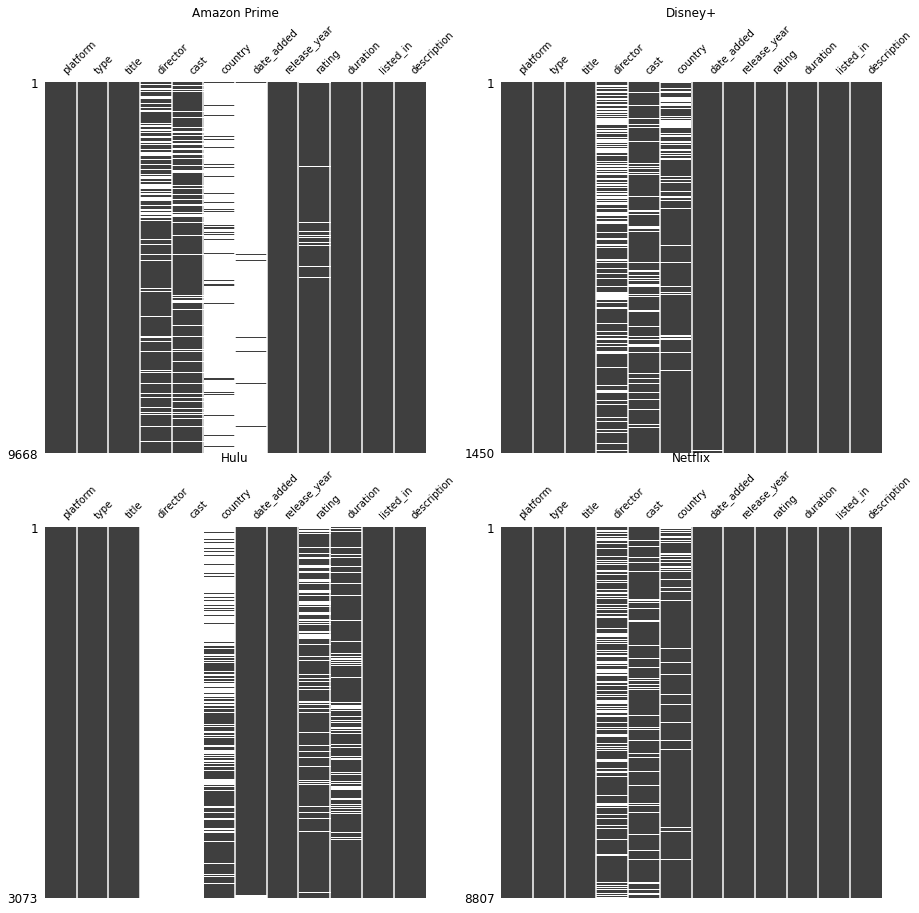

In [110]:
fig, axarr = plt.subplots(2,2)

fig.set_figheight(15)
fig.set_figwidth(15)

missno.matrix(df_dir[df_dir['platform']=='Amazon Prime'], ax=axarr[0][0], fontsize=10)
axarr[0][0].set_title("Amazon Prime")

missno.matrix(df_dir[df_dir['platform']=='Disney+'], ax=axarr[0][1], fontsize=10)
axarr[0][1].set_title("Disney+")

missno.matrix(df_dir[df_dir['platform']=='Hulu'], ax=axarr[1][0], fontsize=10)
axarr[1][0].set_title("Hulu")

missno.matrix(df_dir[df_dir['platform']=='Netflix'], ax=axarr[1][1], fontsize=10)
axarr[1][1].set_title("Netflix")

### Distribution of number of directors in the dataset

- There may be more than one director for a show (separated by commas in the 'director' columns
- We find most shows overwhelmingly have only one director (13,000+ shows), followed by two directors (1000+) which is an order of magnitude lower in quantity than movies with one director
- We assume here that in the 'director' column, the directors are ordered by importance. Hence, we create a new column 'main_director' to capture that information

In [111]:
# Create a dummy column to count the number of directors in each show
df['director'] = df['director'].str.split(',')
df['n_director'] = df['director'].str.len()

# the distribution of number of directors:
data = df['n_director'].value_counts()
data

1.0     13497
2.0      1081
3.0       102
4.0        22
5.0        14
7.0         4
6.0         3
8.0         3
11.0        3
12.0        3
10.0        3
9.0         2
17.0        1
13.0        1
Name: n_director, dtype: int64

### Summarize directors - create a new *'main_director'* column
- The function `create_col_major_director` creates a new column outlining the main director of the show

In [112]:
def create_col_main_director(df):

    # Step 1, we create a new column to house only the main director
    df['main_director'] = df['director'].apply(lambda x : x.split(',')[0] if not pd.isnull(x) else np.nan)
    
    # Step 2, we re-arrange the layout of the columns
    df = movecol(df, cols_to_move=['main_director'], ref_col='director', place='After')
    
    return df

In [113]:
df = comb_platform('platform_files.txt')

In [114]:
df = create_col_main_director(df)

In [115]:
df


,platform,type,title,director,main_director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Amazon Prime,Movie,The Grand Seduction,Don McKellar,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,Amazon Prime,Movie,Take Care Good Night,Girish Joshi,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,Amazon Prime,Movie,Secrets of Deception,Josh Webber,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,Amazon Prime,Movie,Pink: Staying True,Sonia Anderson,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,Amazon Prime,Movie,Monster Maker,Giles Foster,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22993,Netflix,Movie,Zodiac,David Fincher,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
22994,Netflix,TV Show,Zombie Dumb,NaN,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
22995,Netflix,Movie,Zombieland,Ruben Fleischer,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
22996,Netflix,Movie,Zoom,Peter Hewitt,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## Process *'cast'* column
- Like 'director', the 'cast' data is more than 50% complete, and is missing completely in the Hulu dataset
- As expected there is greater variability in the number of cast in show, although there are still a number of shows with only 1 cast, likely due to titles like stand-up comedies, and health-and-fitness shows.

In [116]:
df = comb_platform('platform_files.txt')

In [117]:
# Create a dummy column to count the number of directors in each show
df['n_cast'] = df['cast'].str.split(',')
df['n_cast'] = df['n_cast'].str.len()

# Print the distribution of number of cast
data = df['n_cast'].value_counts()
data

1.0     2130
6.0     2128
3.0     1821
10.0    1659
5.0     1568
4.0     1563
8.0     1512
7.0     1108
2.0     1089
9.0      927
11.0     604
12.0     375
13.0     247
14.0     184
15.0     179
16.0      99
17.0      74
18.0      66
19.0      50
20.0      46
21.0      35
22.0      26
24.0      20
23.0      17
25.0      14
26.0      14
34.0      12
35.0      12
28.0      10
31.0      10
27.0      10
30.0       7
33.0       7
29.0       6
32.0       5
44.0       4
50.0       4
42.0       3
40.0       3
47.0       3
41.0       2
38.0       2
36.0       2
62.0       2
56.0       2
43.0       2
51.0       2
39.0       2
57.0       1
71.0       1
45.0       1
76.0       1
73.0       1
55.0       1
63.0       1
37.0       1
65.0       1
68.0       1
Name: n_cast, dtype: int64

### Summarize cast - create new columns to capture important cast data
- The function `create_cols_main_cast` creates new columns summarizing the cast of the show
- 'n_cast': outline the number of cast
- 'main_cast_1': the first cast in the list of casts
- 'main_cast_2': the second cast
- etc and extract up to 6 casts, as that is the average number of casts in the dataset

In [118]:
def create_cols_main_cast(df, n=2, set_n=False):
    
    # Step 1: create a column 'n_cast' to count the number of cast
    # note this returns a null (NaN) value if the 'cast' column is a null (NaN)
    df['n_cast'] = df['cast'].str.split(',')
    df['n_cast'] = df['n_cast'].str.len()
    
    # step 2: determine the number of main cast columns to create:
    #
    # parameter 'set_n' lets user specify the number of cast columns to create:
    #    if it is set to False, the function automatically create the x columns
    #        where x is the average number of casts in the dataset
    #    otherwise, 
    #        number of columns will be set to n, which is specified by the user
    if not set_n:
        n = int(df['n_cast'].mean()) 
    
    # Step 3: Dynamically create new columns
    for i in range(n):
        col_name = 'main_cast_' + str(i+1)
        df[col_name] = df['cast'].apply(lambda x : x.split(',')[i] if (not pd.isnull(x) and len(x.split(',')) >= (i+1))  else np.nan)
  
    
    # Step 3, we re-arrange the layout of the columns (starting from 'n_cast' column)
    col_list = list(df.columns)
    start_col = col_list.index('n_cast')
    cols_to_move = col_list[start_col:]
    
    df = movecol(df, cols_to_move, ref_col='cast', place='After')
    
    return df

In [119]:
df = comb_platform('platform_files.txt')

In [120]:
df = create_cols_main_cast(df, n=2, set_n=True)

In [121]:
df

,platform,type,title,director,cast,n_cast,main_cast_1,main_cast_2,country,date_added,release_year,rating,duration,listed_in,description
0,Amazon Prime,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",3.0,Brendan Gleeson,Taylor Kitsch,Canada,2021-03-30,2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,Amazon Prime,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",3.0,Mahesh Manjrekar,Abhay Mahajan,India,2021-03-30,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,Amazon Prime,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",6.0,Tom Sizemore,Lorenzo Lamas,United States,2021-03-30,2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,Amazon Prime,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",6.0,Interviews with: Pink,Adele,United States,2021-03-30,2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,Amazon Prime,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",8.0,Harry Dean Stanton,Kieran O'Brien,United Kingdom,2021-03-30,1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22993,Netflix,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",10.0,Mark Ruffalo,Jake Gyllenhaal,United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
22994,Netflix,TV Show,Zombie Dumb,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
22995,Netflix,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",7.0,Jesse Eisenberg,Woody Harrelson,United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
22996,Netflix,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",9.0,Tim Allen,Courteney Cox,United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## Incorporate IMDb critic ratings to the titles
- We supplement our combined dataset with critic ratings (IMDb) using a new dataset.
- This dataset includes IMDb and Rotten Tomatoes ratings of shows hosted on the four streaming platforms above.

*Data Source:*
- https://www.kaggle.com/code/ruchi798/movies-data-collection-eda-using-tableau/data

### Merge critic ratings to the existing dataframe
- The function `merge_critic_ratings` incorporates the critic ratings (both IMDb and Rotten Tomatoes)
- Merging is done based on commonality in the two dataframes across: (1) the show title (converted to all smallcaps and single spacing between words), (2) the release year. We include also the release year, as there are different shows with the same titles.

### Comments
- Based on the methodology above, the are only about 4,500 titles with IMDb ratings, which is only about 20% of all titles in our combined dataset. This could be that our ratings dataset only cover movies, and there may be inconsistencies between title names and release dates.

In [122]:
# function merges IMDb critic ratings to the existing dataset of platform shows
# df_comb is the dataframe of combined platforms

def merge_critic_ratings(rating_file, df_comb):
    df_ratings = pd.read_csv(rating_file)
    
    # created a 'new_title' column (lower caps, only one space) for both dataframes
    df_comb['new_title'] = df_comb['title'].apply(lambda x: " ".join(x.split()).lower())
    df_ratings['new_title'] = df_ratings['Title'].apply(lambda x: " ".join(x.split()).lower())
    
    # incorporate the critic ratings using the merge function
    df_new = pd.merge(df_comb, df_ratings[['new_title', 'Year','IMDb', 'Rotten Tomatoes', ]], how="left", left_on=['new_title', 'release_year'], right_on=['new_title', 'Year'])
    
    # remove redundant columns
    df_new = df_new.drop(['new_title', 'Year'], axis=1)
    
    return df_new

In [123]:
# test
df_comb = comb_platform('platform_files.txt')
rating_file = 'ratings_MoviesRatings.csv'

df_comb = merge_critic_ratings(rating_file, df_comb)

In [124]:
df_comb.notnull().sum()

platform           22998
type               22998
title              22998
director           14739
cast               17677
country            11499
date_added         13444
release_year       22998
rating             22134
duration           22516
listed_in          22998
description        22994
IMDb                4549
Rotten Tomatoes     2208
dtype: int64

In [125]:
df_imbd = df_comb[~df_comb['IMDb'].isnull()]

In [126]:
df_imbd.tail(50)

,platform,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,IMDb,Rotten Tomatoes
22856,Netflix,Movie,Urvi,Pradeep Verma,"Sruthi Hariharan, Shraddha Srinath, Shweta Pan...",India,2018-01-15,2017,TV-MA,121 min,"Dramas, Independent Movies, International Movies",After getting tricked into working at a brothe...,7.0,NaN
22858,Netflix,Movie,USS Indianapolis: Men of Courage,Mario Van Peebles,"Nicolas Cage, Tom Sizemore, Thomas Jane, Matt ...",United States,2019-09-25,2016,R,130 min,Action & Adventure,After becoming stranded in the Philippine Sea ...,5.2,17%
22862,Netflix,Movie,Veerappan,Ram Gopal Varma,"Sandeep Bharadwaj, Sachiin Joshi, Lisa Ray, Us...",India,2017-10-15,2016,TV-14,117 min,"Action & Adventure, Dramas, International Movies",A police official assembles an elaborate netwo...,5.3,NaN
22867,Netflix,Movie,Viking Destiny,David L.G. Hughes,"Anna Demetriou, Timo Nieminen, Will Mellor, An...","United Kingdom, Belgium",2019-02-02,2018,R,91 min,"Action & Adventure, Sci-Fi & Fantasy","Framed for her father’s murder, an exiled Viki...",4.2,13%
22869,Netflix,Movie,Vincent N Roxxy,Gary Michael Schultz,"Emile Hirsch, Zoë Kravitz, Emory Cohen, Zoey D...",United States,2017-09-02,2016,R,101 min,"Dramas, Thrillers","In rural Louisiana, a terse loner forges a red...",5.5,41%
22871,Netflix,Movie,Viswasapoorvam Mansoor,P.T. Kunju Muhammad,"Roshan Mathew, Asha Sarath, Prayaga Martin, Za...",India,2018-07-01,2017,TV-14,125 min,"Dramas, International Movies",When a mother and her daughter arrive to stay ...,6.3,NaN
22872,Netflix,Movie,Vitti Dandu,Ganesh Kadam,"Dilip Prabhavalkar, Ashok Samarth, Yatin Karye...",India,2017-07-15,2014,TV-14,116 min,"Dramas, International Movies","In a remote village in colonial India, an old ...",7.5,NaN
22873,Netflix,Movie,Vizontele Tuuba,Yılmaz Erdoğan,"Yılmaz Erdoğan, Tarık Akan, Altan Erkekli, Cez...",Turkey,2017-03-10,2004,NR,106 min,"Comedies, Dramas, International Movies","With civil war looming, a TV-obsessed Turkish ...",6.5,NaN
22874,Netflix,Movie,Vodka Diaries,Kushal Srivastava,"Kay Kay Menon, Raima Sen, Mandira Bedi, Sharib...",India,2019-12-31,2018,TV-14,113 min,"Dramas, International Movies, Thrillers",While investigating a series of murders and th...,5.6,NaN
22877,Netflix,Movie,Waar,Bilal Lashari,"Shaan Shahid, Shamoon Abbasi, Ayesha Khan, Mee...",Pakistan,2017-07-01,2013,TV-MA,130 min,"Action & Adventure, International Movies",When Pakistani authorities learn of a looming ...,7.9,NaN


limit_output extension: Maximum message size of 10000 exceeded with 24634 characters

## Incorporate Metacritic ratings to the titles
- We supplement our combined dataset with Metacritic using the dataset scrapped from MetaCritic's website
- This dataset includes both critic and user ratings

### Merge critic ratings to the existing dataframe
- The function `merge_metacritic_ratings` incorporates the Metacritic ratings
- Merging is done based on commonality in the two dataframes across: (1) the show title (converted to all smallcaps and single spacing between words), (2) the release year. We include also the release year, as there are different shows with the same titles.

### Comments
- Based on the methodology above, the are only c. 3,000 titles with Metacritic ratings, which is only about 13% of all titles in our combined dataset.

    - First we process scrapped dataset

In [127]:
# Process scrapped dataset
df_mt_movie = pd.read_csv("metacritic_movie_ratings.csv")
df_mt_tv = pd.read_csv("metacritic_tv_ratings.csv")

# include column to differentiate titles from Movies and TV Shows
df_mt_movie['type'] = 'Movie'
df_mt_tv['type'] = 'TV Show'

# join these two datasets
df_mt_rating = pd.concat([df_mt_movie, df_mt_tv], ignore_index=True)

# drop titles with no release dates
df_mt_rating.loc[df_mt_rating['Date_Released'].str.contains('TBA', case=False)] = np.nan
df_mt_rating = df_mt_rating.dropna()

# create a new column to record the release year of titles
df_mt_rating['Date_Released'] = pd.to_datetime(df_mt_rating['Date_Released'])
df_mt_rating['Year_Released'] = df_mt_rating['Date_Released'].dt.year

    - Function below merges Metacritic critic ratings to the existing dataset of platform shows

In [128]:
# function merges Metacritic critic ratings to the existing dataset of platform shows
# df_comb is the dataframe of combined platforms

def merge_metacritic_ratings(df_mt_rating, df_comb):
    
    # created a 'new_title' column (lower caps, only one space) for both dataframes
    df_comb['new_title'] = df_comb['title'].apply(lambda x: " ".join(x.split()).lower())
    df_mt_rating['new_title'] = df_mt_rating['Title'].apply(lambda x: " ".join(x.split()).lower())
    
    # incorporate the critic ratings using the merge function
    df_new = pd.merge(df_comb, df_mt_rating[['new_title', 'Year_Released','Metacritic_Score', 'Metacritic_User_Score', ]], how="left", left_on=['new_title', 'release_year'], right_on=['new_title', 'Year_Released'])
    
    # remove redundant columns
#     df_new = df_new.drop(['new_title', 'Year_Released'], axis=1)
    
    return df_new

In [129]:
df_comb = comb_platform('platform_files.txt')
df_comb = merge_metacritic_ratings(df_mt_rating, df_comb)

    - Post merging, we see that we have c. 3,000 titles with Metacritic scores

In [130]:
df_comb.notnull().sum()

platform                 22998
type                     22998
title                    22998
director                 14739
cast                     17677
country                  11499
date_added               13444
release_year             22998
rating                   22134
duration                 22516
listed_in                22998
description              22994
new_title                22998
Year_Released             2995
Metacritic_Score          2995
Metacritic_User_Score     2995
dtype: int64

## Map numbers in columns into targeted histogram bin range

In [131]:
# Find range between start and end date
"""
input : df, column_start_date, column_end_date, date_format = "%Y-%m-%d",
output : column name of the gap
added column: gap_{gap_type[0]}, gap_day
"""


def get_gap_between_dates(df,
                          column_date_start: str,
                          column_date_end: str,
                          format_start="%Y-%m-%d",
                          format_end="%Y-%m-%d",
                          gap_type="Year"):
    gap_col = f"gap_{gap_type}_"
    df["gap_day_"] = pd.to_datetime(df[column_date_end], format=format_start) - \
        pd.to_datetime(df[column_date_start], format=format_end)
    df[gap_col] = df["gap_day_"].astype(f"timedelta64[{gap_type[0].upper()}]").astype(int)
    return [gap_col, "gap_day_"]


"""
purpose: map single number into bin_range
inputs:
    input: single number to be mapped into bin_range
outputs:
    bin_range: [min(input_list), start_number_of_range1, start_number_of_range2, ..., max(input_list)]

added column 
"""

def binning(input, bin_range: list):
    input = np.array([input])
    bin_range = np.array(bin_range)
    index = np.argmin(((input - bin_range) >= 0).astype(int)) - 1
    bin = bin_range[index]
    return bin

# def binning_columns(df,
#                     bin_range: list,
#                     input_column="",
#                     output_column_suffix="_bin",
#                     is_plot=True):
#     suffix = output_column_suffix
#     output_col = f"{input_column}_{suffix}"
#     df[output_col] = df[input_column].apply(lambda x: binning(x, bin_range))
#     if is_plot:
#         df[input_column].value_counts()[:20].sort_index().plot(kind="bar")
#         plt.show()
#         df[output_col].value_counts().sort_index().plot(kind="bar")
#         plt.show()
#     return output_col

def binning_columns(
    df, 
    bin_range: list,
    input_column="", 
    output_column_suffix="_bin",
    is_plot=True,
    title="",
    xlabel="",
    ylabel="Frequency",
):
    assert(len(input_column)), print("Please assign name of the column to be binned to input_column.")       
        
    if xlabel=="":
        xlabel=input_column
    
    suffix = output_column_suffix
    output_col = f"{input_column}{suffix}"
    # assert df[input_column].min() < min(bin_range), print(f"{input_column} min values ({df[input_column].min()}) is smaller than {bin_range}")
    # assert df[input_column].max() > max(bin_range), print(f"{input_column} min values ({df[input_column].min()}) is bigger than {bin_range}")
    df[output_col] = df[input_column].apply(lambda x: binning(x, bin_range))
    if is_plot:
        df[input_column].value_counts()[:20].sort_index().plot(
            kind="bar", title=title, xlabel=xlabel, ylabel=ylabel
            )
        plt.show()
        df[output_col].value_counts().sort_index().plot(
            kind="bar",  title = title, xlabel = f"{xlabel}_binned", ylabel = ylabel
            )
        plt.show()
    return output_col
# Find range between start and end date

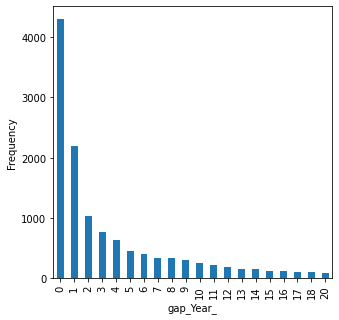

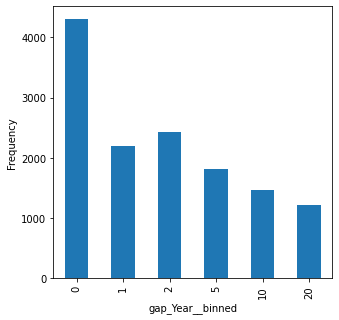

,date_added,release_year,gap_Year_,gap_Year__bin
0,2021-03-30,2014,7,5
1,2021-03-30,2018,3,2


In [132]:
df = comb_platform('platform_files.txt')
df = df[df.date_added.isna() == False]  #remove rows with empty date_added

gap_year, gap_day = get_gap_between_dates(df,
                                          column_date_start="release_year",
                                          format_start="%Y-%m-%d",
                                          column_date_end="date_added",
                                          format_end="%Y",
                                          gap_type="Year")

df = df[df[gap_year] >= 0]
bin_range = [df[gap_year].min(), 0, 1, 2, 5, 10, 20, df[gap_year].max() + 1]
output_col = binning_columns(df=df, input_column=gap_year, bin_range=bin_range)
display(df[["date_added", "release_year", gap_year, output_col]].head(2))

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13424 entries, 0 to 22997
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   platform       13424 non-null  object         
 1   type           13424 non-null  object         
 2   title          13424 non-null  object         
 3   director       7166 non-null   object         
 4   cast           9323 non-null   object         
 5   country        10800 non-null  object         
 6   date_added     13424 non-null  datetime64[ns] 
 7   release_year   13424 non-null  int64          
 8   rating         12887 non-null  object         
 9   duration       12943 non-null  object         
 10  listed_in      13424 non-null  object         
 11  description    13420 non-null  object         
 12  gap_day_       13424 non-null  timedelta64[ns]
 13  gap_Year_      13424 non-null  int64          
 14  gap_Year__bin  13424 non-null  int64          
dtypes:

# Stats and Visualization

    - Generate clean and enriched dataframe using the cleanup functions from Section 6

In [134]:
# Generate dataframe from cleanups described previously


# combined platform files into a dataframe
df = comb_platform('platform_files.txt')

# clean up rating and duration columns
df = correct_ratings_to_duration(df)
df = split_duration(df)

# create new column to aggregate rating data
age_bucket_file = 'rating_age_bucket.csv'
df = create_rating_age_bucket(df, age_bucket_file)

# group genre and create one-hot encoding of major genres
genre_dict = get_genre_dict("genre_cleaning.txt")
df = is_df_series_exist_in_dict_values(df=df, col_header="listed_in", genre_dict=genre_dict)

# summarize directors by creating a new 'main_director' column
df = create_col_main_director(df)

# summarize cast by creating a new 'main_cast' columns
df = create_cols_main_cast(df, n=2, set_n=True)

# merge critic ratings
rating_file = 'ratings_MoviesRatings.csv'
df = merge_critic_ratings(rating_file, df)

# cleaning and filling director, cast and description columns
df = replace_dictionary(df,'director')
df = replace_dictionary(df,'cast')
df = replace_dictionary(df,'description')

pd.set_option('display.max_columns', None)

## Simple Statistics

In [135]:
df.describe()

,release_year,_Action & Adventure,_Anime,_Children & Family,_Classics,_Comedy,_Crime & Mystery,_Documentary,_Drama,_Horror,_Music,_Others,_Romance,_Sci-Fi & Fantasy,_Sports,_Thrillers,_Tv Shows,_International Movies
count,22998.000000,22998.000000,22998.000000,22998.000000,22998.000000,22998.000000,22998.000000,22998.000000,22998.000000,22998.000000,22998.000000,22998.000000,22998.000000,22998.000000,22998.000000,22998.000000,22998.000000,22998.000000
mean,2010.811244,0.167188,0.076354,0.149274,0.007783,0.257370,0.036786,0.142839,0.355422,0.070050,0.030568,0.180798,0.081181,0.053570,0.024393,0.103226,0.085921,0.119663
std,15.401142,0.373152,0.265570,0.356366,0.087881,0.437195,0.188240,0.349916,0.478651,0.255236,0.172148,0.384859,0.273119,0.225172,0.154271,0.304261,0.280253,0.324574
min,1920.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2021.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [136]:
df.describe(include='object')

,platform,type,title,director,main_director,cast,n_cast,main_cast_1,main_cast_2,country,date_added,rating,targeted_age,duration,duration_type,listed_in,description,IMDb,Rotten Tomatoes,new_title
count,22998,22998,22998,14739,14739,17677,17677.0,17677,15547,11499,13444,21839,21839,22811,22811,22998,22994,4549.0,2208,22998
unique,4,2,22115,10105,9822,16748,58.0,11335,11551,886,2003,27,5,225,2,1687,22669,72.0,99,22040
top,Amazon Prime,Movie,Survivor,Mark Knight,Mark Knight,Maggie Binkley,1.0,Maggie Binkley,Champion,United States,2019-11-12 00:00:00,TV-MA,Adult,1,min,Drama,"Arpo was designed as a commando robot, built a...",6.2,100%,married at first sight
freq,9668,16481,3,113,113,56,2130.0,56,29,4997,724,3675,7081,4236,16232,1061,15,190.0,155,4


## Null analysis

/usr/lib/python3.7/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  "Plotting a sparkline on an existing axis is not currently supported. "


Text(0.5, 1.0, 'Netflix')

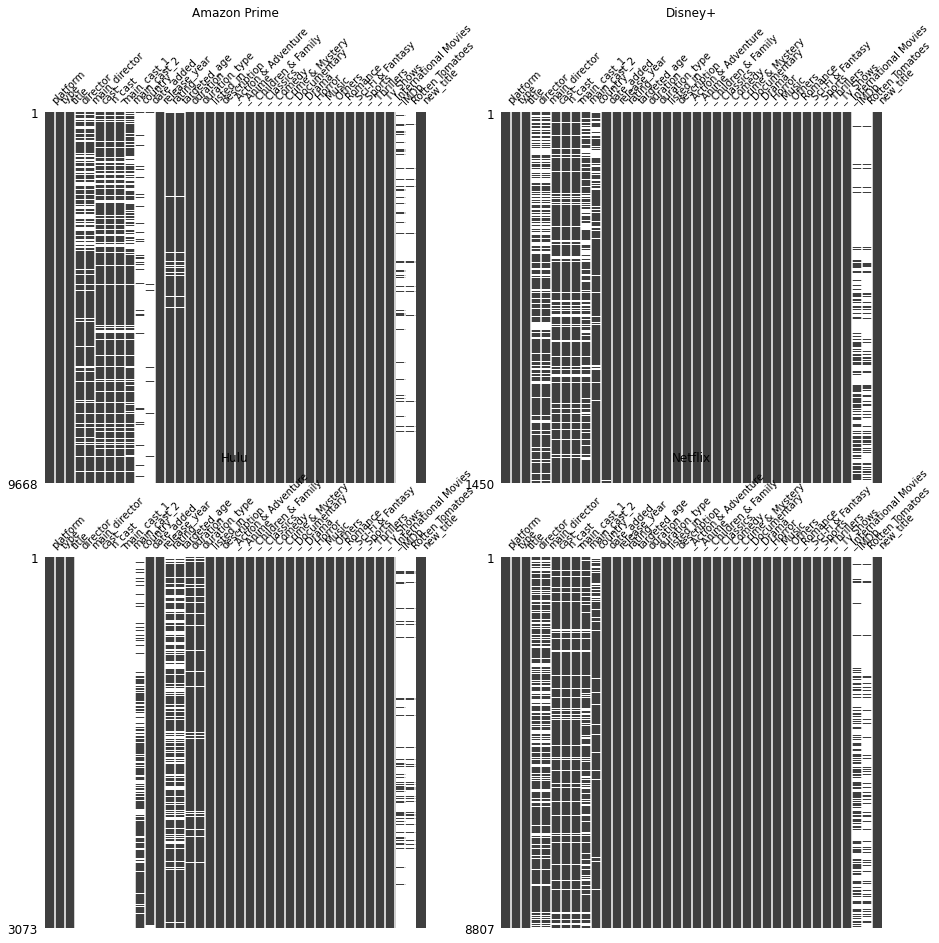

In [137]:
fig, axarr = plt.subplots(2,2)

fig.set_figheight(15)
fig.set_figwidth(15)

missno.matrix(df[df['platform']=='Amazon Prime'], ax=axarr[0][0], fontsize=10)
axarr[0][0].set_title("Amazon Prime")

missno.matrix(df[df['platform']=='Disney+'], ax=axarr[0][1], fontsize=10)
axarr[0][1].set_title("Disney+")

missno.matrix(df[df['platform']=='Hulu'], ax=axarr[1][0], fontsize=10)
axarr[1][0].set_title("Hulu")

missno.matrix(df[df['platform']=='Netflix'], ax=axarr[1][1], fontsize=10)
axarr[1][1].set_title("Netflix")

In [138]:
df.isnull().sum()

platform                     0
type                         0
title                        0
director                  8259
main_director             8259
cast                      5321
n_cast                    5321
main_cast_1               5321
main_cast_2               7451
country                  11499
date_added                9554
release_year                 0
rating                    1159
targeted_age              1159
duration                   187
duration_type              187
listed_in                    0
description                  4
_Action & Adventure          0
_Anime                       0
_Children & Family           0
_Classics                    0
_Comedy                      0
_Crime & Mystery             0
_Documentary                 0
_Drama                       0
_Horror                      0
_Music                       0
_Others                      0
_Romance                     0
_Sci-Fi & Fantasy            0
_Sports                      0
_Thrille

## Distribution of types of shows by platform

In [139]:
df_show_type = df[['platform', 'type']]

### Number of shows by type on each respective platform
- Amazon Prime and Netflix has the most number of shows, and their titles focus more on movies

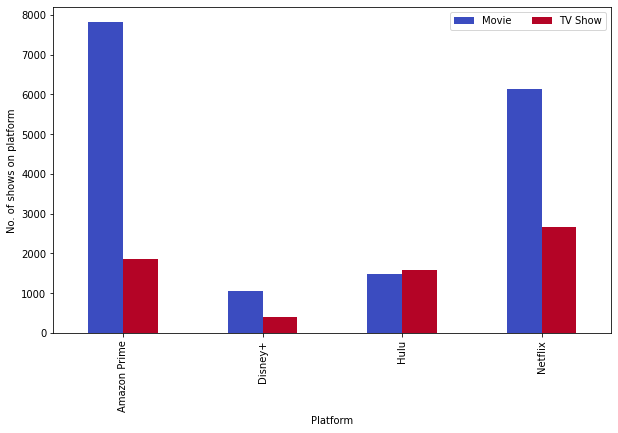

In [140]:
cross_tab_shows = pd.crosstab(index=df_show_type['platform'], columns=df_show_type['type'])

cross_tab_shows.plot(kind='bar', stacked=False, colormap='coolwarm', figsize=(10,6))

plt.legend(loc='best', ncol=6)
plt.xlabel('Platform')
plt.ylabel('No. of shows on platform')
plt.show()

### Proportion of shows by type on each respective platform
- In terms of proportions, Hulu has the highest proportion of TV-show offerings of all the platforms

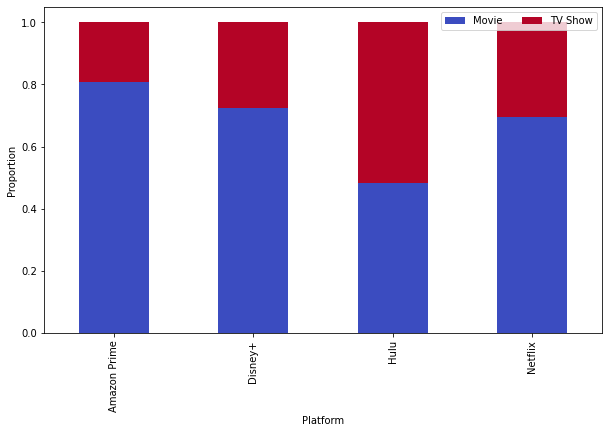

In [141]:
cross_tab_show_type = pd.crosstab(index=df_show_type['platform'], columns=df_show_type['type'], normalize='index')

cross_tab_show_type.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10,6))

plt.legend(loc='best', ncol=6)
plt.xlabel('Platform')
plt.ylabel('Proportion')
plt.show()

## IMDb ratings distribution
- The number of available IMDb ratings do not follow that of movies available on each platform

- Chart below shows the total number of movies on the platforms

<AxesSubplot:xlabel='platform', ylabel='count'>

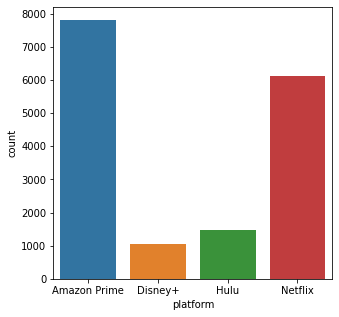

In [142]:
sns.countplot(data=df[df['type']=='Movie'], x='platform')

In [143]:
df_imdb_plot = df[['platform', 'IMDb']]
df_imdb_plot = df_imdb_plot.dropna()

- While the chart below shows ratings available on platforms

<AxesSubplot:xlabel='platform', ylabel='count'>

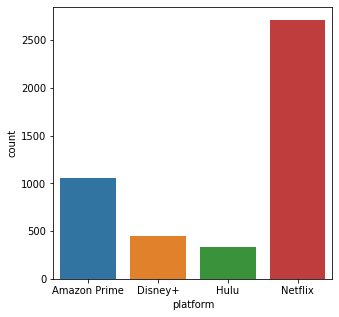

In [144]:
sns.countplot(data=df_imdb_plot, x='platform')

- However, based on the data available, it seems that the overall ratings on each platform are similarly distributed, peaking somewhere between 6 and 7.

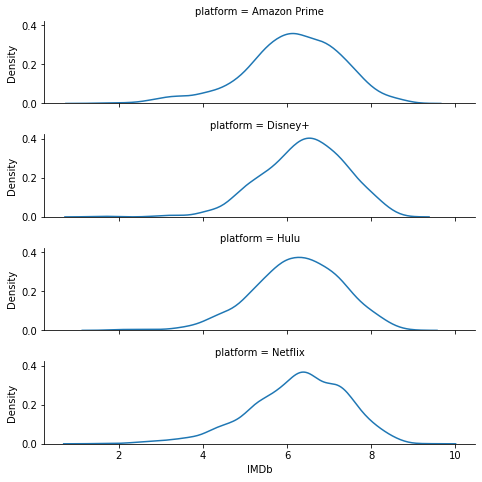

In [145]:
g = sns.FacetGrid(df_imdb_plot, row='platform', height=1.7, aspect=4,)
g.map(sns.kdeplot, 'IMDb')

## Rating distribution by genre

In [146]:
display(df.head(2))

,platform,type,title,director,main_director,cast,n_cast,main_cast_1,main_cast_2,country,date_added,release_year,rating,targeted_age,duration,duration_type,listed_in,description,_Action & Adventure,_Anime,_Children & Family,_Classics,_Comedy,_Crime & Mystery,_Documentary,_Drama,_Horror,_Music,_Others,_Romance,_Sci-Fi & Fantasy,_Sports,_Thrillers,_Tv Shows,_International Movies,IMDb,Rotten Tomatoes,new_title
0,Amazon Prime,Movie,The Grand Seduction,Don McKellar,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",3.0,Brendan Gleeson,Taylor Kitsch,Canada,2021-03-30 00:00:00,2014,None,None,113,min,"Comedy, Drama",A small fishing village must procure a local d...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,None,None,the grand seduction
1,Amazon Prime,Movie,Take Care Good Night,Girish Joshi,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",3.0,Mahesh Manjrekar,Abhay Mahajan,India,2021-03-30 00:00:00,2018,13+,Teens,110,min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,None,None,take care good night


Chart 1/17: _Action & Adventure with 3845 titles


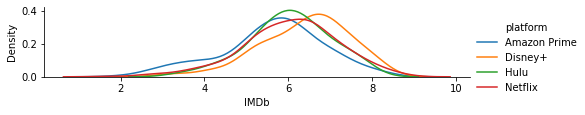

Chart 2/17: _Anime with 1756 titles


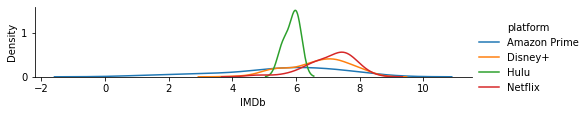

Chart 3/17: _Children & Family with 3433 titles


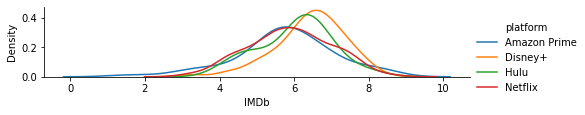

Chart 4/17: _Classics with 179 titles


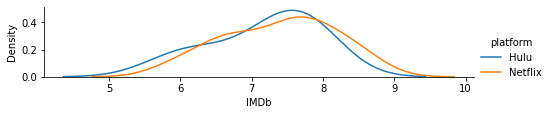

Chart 5/17: _Comedy with 5919 titles


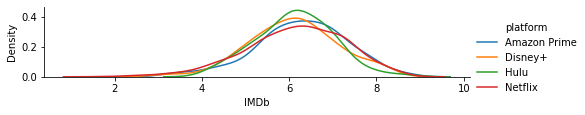

Chart 6/17: _Crime & Mystery with 846 titles


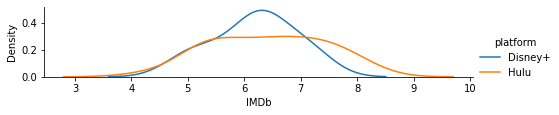

Chart 7/17: _Documentary with 3285 titles


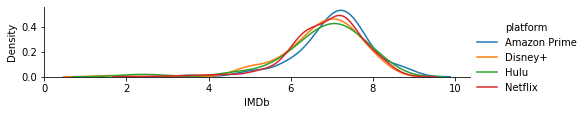

Chart 8/17: _Drama with 8174 titles


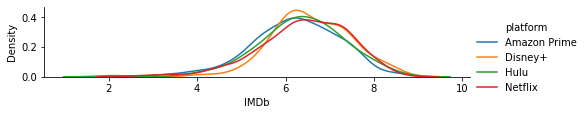

Chart 9/17: _Horror with 1611 titles


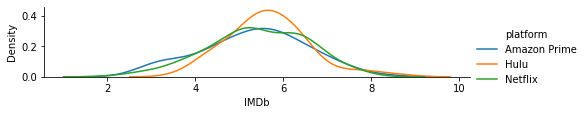

Chart 10/17: _Music with 703 titles


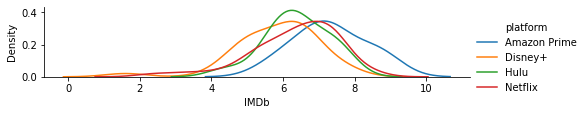

Chart 11/17: _Others with 4158 titles


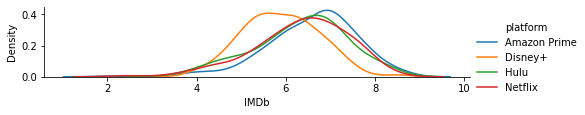

Chart 12/17: _Romance with 1867 titles


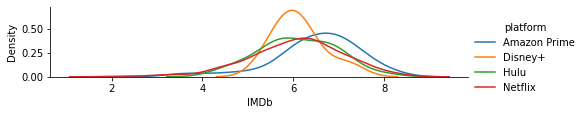

Chart 13/17: _Sci-Fi & Fantasy with 1232 titles


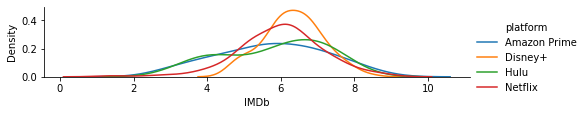

Chart 14/17: _Sports with 561 titles


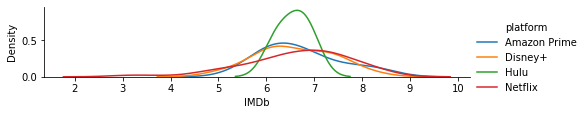

Chart 15/17: _Thrillers with 2374 titles


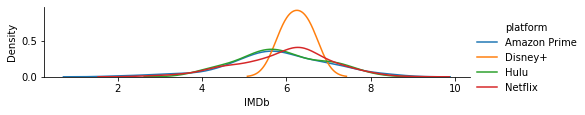

Chart 16/17: _Tv Shows with 1976 titles


/usr/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


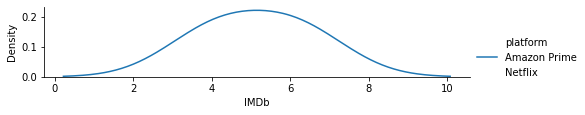

Chart 17/17: _International Movies with 2752 titles


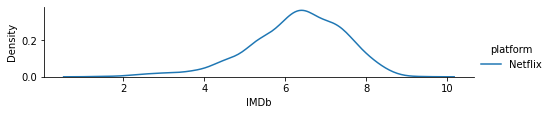

In [147]:
genre_column = list(map(lambda x: f"_{x}".title(), list(genre_dict.keys()) ))
num_row_by_genre_dict = df[genre_column].aggregate('sum', axis=0)
# print("Genre \t number of titles")
# print(num_row_by_genre_dict)

for t, g in enumerate(genre_column):

   dfg = df[df[g]==1]
   print(f"Chart {t+1}/{len(genre_column)}: {g} with {len(dfg)} titles")
   df_imdb_plot_g = dfg[['platform', 'IMDb']].dropna()
   g = sns.FacetGrid(df_imdb_plot_g, hue='platform', height=1.7, aspect=4)
   g.map(sns.kdeplot, 'IMDb')
   g.add_legend()
   plt.show()   
    

## Analysis of release years by platforms

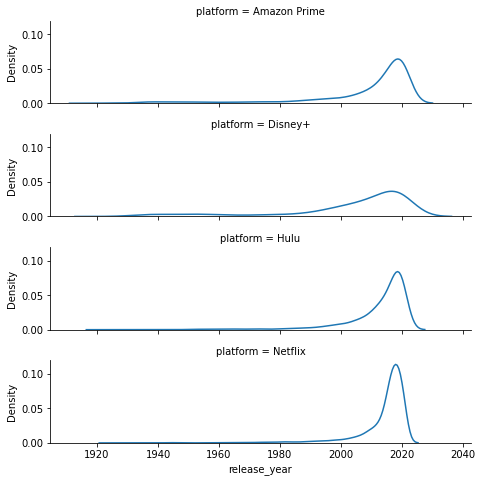

In [9]:
df = comb_platform('platform_files.txt')
df_release_year = df[['platform', 'release_year']].dropna()

g_release_year = sns.FacetGrid(df_release_year, row='platform', height=1.7, aspect=4,)
g_release_year.map(sns.kdeplot, 'release_year')

## Analysis of time gap between show release year and date it was added to a platform
- Based on the analysis, we see that Netflix has the highest proportion of new movies. On the data available, more than 50% of Netflix's shows are added on its platform less than two years after it was released. This is followed by Amazon Prime, in which c. 40% of shows were added on its platform after it was released.
- Disney+ has distinctively more older shows on its platform. On the data available, where c. 50% of its titles has more than 10 years' gap between when it was released and listed on its platform. This could be due to the fact that Disney is a much older company has owns many classic titles which it then releases on its streaming platform.

In [72]:
df_date = comb_platform('platform_files.txt')
df_date = df_date[df_date.date_added.isna() == False]  #remove rows with empty date_added

gap_year, gap_day = get_gap_between_dates(df_date,
                                          column_date_start="release_year",
                                          format_start="%Y-%m-%d",
                                          column_date_end="date_added",
                                          format_end="%Y",
                                          gap_type="Year")

df_date = df_date[df_date[gap_year] >= 0]
bin_range = [df_date[gap_year].min(), 0, 1, 2, 5, 10, 20, df_date[gap_year].max() + 1]
output_col = binning_columns(df=df_date, input_column=gap_year, bin_range=bin_range, is_plot=False)

In [73]:
df_date.columns

Index(['platform', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description', 'gap_day_', 'gap_Year_', 'gap_Year__bin'],
      dtype='object')

In [74]:
df_plt_gap = df_date[['platform', 'gap_Year__bin']]

In [75]:
df_plt_gap.notnull().sum()

platform         13424
gap_Year__bin    13424
dtype: int64

In [76]:
df_plt_gap['gap_Year__bin'] = df_plt_gap['gap_Year__bin'].astype('int')

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
cross_tab_gap_prop = pd.crosstab(index=df_plt_gap['platform'], columns=df_plt_gap['gap_Year__bin'], normalize='index')

In [78]:
cross_tab_gap = pd.crosstab(index=df_plt_gap['platform'], columns=df_plt_gap['gap_Year__bin'])

In [1]:
# cross_tab_gap_prop.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10,6))

# plt.legend(loc='best', ncol=6)
# plt.xlabel('Platform')
# plt.ylabel('Percentage')
# plt.show()

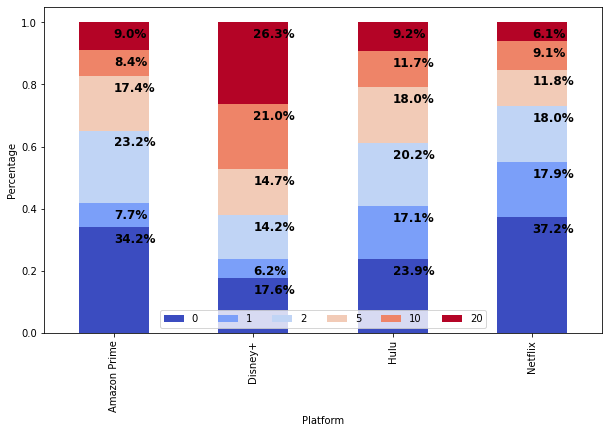

In [80]:
cross_tab_gap_prop.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10,6))

plt.legend(loc='best', ncol=6)
plt.xlabel('Platform')
plt.ylabel('Percentage')

for n, a in enumerate([*cross_tab_gap.index.values]):
    gap = -0.05
    for proportion in cross_tab_gap_prop.loc[a]:            
        plt.text(x=n,
                 y=proportion + gap,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")
        gap += proportion

plt.show()

In [81]:
df.head()

,platform,type,title,director,main_director,cast,n_cast,main_cast_1,main_cast_2,country,date_added,release_year,rating,targeted_age,duration,duration_type,listed_in,description,_Action & Adventure,_Anime,_Children & Family,_Classics,_Comedy,_Crime & Mystery,_Documentary,_Drama,_Horror,_Music,_Others,_Romance,_Sci-Fi & Fantasy,_Sports,_Thrillers,_Tv Shows,_International Movies,IMDb,Rotten Tomatoes,new_title
0,Amazon Prime,Movie,The Grand Seduction,Don McKellar,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",3.0,Brendan Gleeson,Taylor Kitsch,Canada,2021-03-30 00:00:00,2014,None,None,113,min,"Comedy, Drama",A small fishing village must procure a local d...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,None,None,the grand seduction
1,Amazon Prime,Movie,Take Care Good Night,Girish Joshi,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",3.0,Mahesh Manjrekar,Abhay Mahajan,India,2021-03-30 00:00:00,2018,13+,Teens,110,min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,None,None,take care good night
2,Amazon Prime,Movie,Secrets of Deception,Josh Webber,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",6.0,Tom Sizemore,Lorenzo Lamas,United States,2021-03-30 00:00:00,2017,None,None,74,min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,None,None,secrets of deception
3,Amazon Prime,Movie,Pink: Staying True,Sonia Anderson,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",6.0,Interviews with: Pink,Adele,United States,2021-03-30 00:00:00,2014,None,None,69,min,Documentary,"Pink breaks the mold once again, bringing her ...",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,None,None,pink: staying true
4,Amazon Prime,Movie,Monster Maker,Giles Foster,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",8.0,Harry Dean Stanton,Kieran O'Brien,United Kingdom,2021-03-30 00:00:00,1989,None,None,45,min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,None,None,monster maker


In [82]:
df.type.unique()

array(['Movie', 'TV Show'], dtype=object)